In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/Overlap2022_11_30_16_50_41_L15_1',delimiter=',')

z0 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/z_2022_11_30_16_50_41_L15_1',delimiter=',')
zz0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/zz_2022_11_30_16_50_41_L15_1',delimiter=',')

In [5]:
tlist = np.array([2.8, 3.1, 3.4, 3.7 ,4,5.6])
print(tlist)
crit_id0 = []
for i in range(0,len(tlist)):
    crit_id0.append(np.argmin(abs(data[0]-tlist[i])))
print(crit_id0)

[2.8 3.1 3.4 3.7 4.  5.6]
[163, 169, 175, 181, 186, 217]


[ 0  2  4  6  8 10 12]
[0.5944963219430226, 0.2425182029831972, 0.13297085227408928, 0.10141954793238628, 0.10753409901697336, 0.14733518884813068, 0.2466483157346241]
[0.6115982312680783, 0.2681611720221922, 0.16456274819413408, 0.1449910706810793, 0.17030736118251627, 0.22238088642812143, 0.31493558123855225]
[0.6387669762124317, 0.3156458781092912, 0.2212429040757004, 0.19413019531496534, 0.20317371001089002, 0.24961804330095017, 0.35910096400184843]
[0.6417268916771549, 0.31854355669543355, 0.23263037473171289, 0.22185318645649355, 0.23921701689332098, 0.28205204431105957, 0.3784722286844965]
[0.6801488420210986, 0.38089461807597447, 0.28777007773824803, 0.2646053897893841, 0.2835436152870727, 0.32788181767628477, 0.42785877118687515]
[0.9620697445327691, 0.9235985735502475, 0.9199173369747945, 0.9153947718354601, 0.9110843599619803, 0.9105513347117848, 0.9192809907254478]


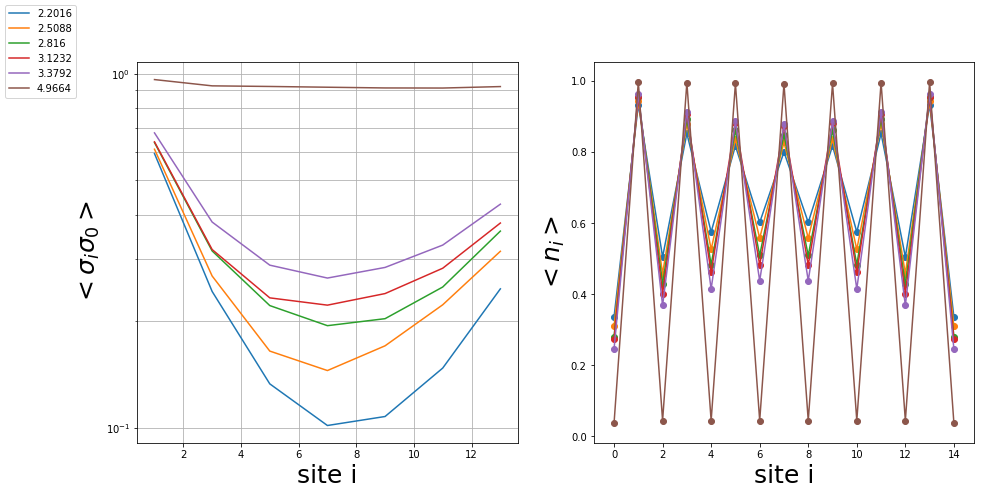

In [6]:
N = 15
center_id = int(N/2)
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(15,7))
sign = np.ones(N-1)
sign[0::2]=-1
x2 = np.arange(0,N-2,2)
print(x2)

for i in range(len(crit_id0)):
    t_id = crit_id0[i]
    z = z0[t_id]
    zz = zz0[t_id].reshape(N,N)
    n = (1-z)/2
    sigma = (n[0:N-1]-n[1:N])*sign
    nn = (np.ones((N,N))-z-z[:,np.newaxis]+zz)/4
    x = np.arange(1,N)
    sigma_c = []
    sigma2 = []

    for i in x2:
        temp = ( (-1)**i * (nn[center_id-int(i/2),center_id+int(i/2)]\
                               +nn[center_id-int(i/2)+1,center_id+int(i/2)+1]\
                               -nn[center_id-int(i/2)+1,center_id+int(i/2)]\
                               -nn[center_id-int(i/2),center_id+int(i/2)+1]))
        sigma2.append(temp)
        sigma_c.append(temp-sigma[center_id-int(i/2)]*sigma[center_id+int(i/2)])
    print(sigma2)
  #  ax[0].plot(x2+1,sigma_c,label='evolved state, disconnected part')
    
#     ax[0].scatter(x2+1,sigma_c,label='evolved state, connected part')
    ax[0].plot(x2+1,sigma2,label= str(round(data[0][t_id]-0.6,4)))
    ax[0].set_xlabel('site i',fontsize = 25)
    ax[0].set_ylabel('$<\sigma_i\sigma_0>$',fontsize = 25)
    ax[1].scatter(np.arange(0,N),n)
    ax[1].plot(np.arange(0,N),n)
    ax[1].set_xlabel('site i',fontsize = 25)
    ax[1].set_ylabel('$<n_i>$',fontsize = 25)
ax[0].grid(True,which ='both')    
ax[0].set_yscale('log')

fig.legend(loc ='upper left')
# print('Crit Time '+str(np.round(t[t_id],4))+'us')
# print('Crit Detuning '+str(np.round(data[1][t_id],4))+'MHz')
# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(sigma_c_g))